In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterstats
import matplotlib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [2]:
# KD which file is used as the DEM - could we keep evertyhing in NAVD88 instead of converting to reduce uncertainty?
#NOAA DEMs notes
# NAVD88 - datum for second download - in meters
# MHW - datum for SLR DEM download
#NAVD88 is 2.700 m lower than MWH in Eastport - https://tidesandcurrents.noaa.gov/datums.html?datum=NAVD88&units=1&epoch=0&id=8410140&name=Eastport&state=ME

In [3]:
#KD notes
# to get from NAVD88 to HAT: NAVD88 -3.909 = HAT. 
# All data is from excel tide guage spreadsheet 'KD_Eastport_tide_guage_JAN24_NAVD_Meters', downloaded in NAVD88 meters 
# for entire month of January
# largest storm surge reported at Eastport tide guage is 1.112m (verified minus predicted tide) on 1/10/24 in HAT
# largest tide height predicted reported at Eastport tide guage is -0.464m on 1/13/24 in HAT
# the highest tide possible with highest predicted + storm surge is 0.648m above HAT USE FOR PREDICTIONS - didn't actually happen

In [4]:
pts = gpd.read_file(r"D:\Users\Classroom\Desktop\DeWater_Archaeology\1NS_GPKG_WITHOUT3.gpkg")

In [5]:
# pts['NAVD88']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/me2017_eastern_Job786159/me2017_eastern_Job786159.tif',interpolate='nearest')
# pts['NAVD88_2']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/me2017_eastern_Job786160/me2017_eastern_Job786160.tif',interpolate='nearest')
# pts['MHW']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/NOAA_SLR_DEM_Job786141/Job786141_NOAA_SLR_DEM_with_no_data_final.tif',interpolate='nearest')
# pts['MHW_2'] = pts['NAVD88']+2.7 # convert between NAVD88 and MHW

# pts['HAT']= pts['MHW']-1.209 #convert MHW to HAT - https://tidesandcurrents.noaa.gov/datums.html?datum=MHW&units=1&epoch=0&id=8410140&name=Eastport&state=ME
# pts['HAT'].fillna(pts['MHW_2']-1.209,inplace=True)
# pts['HAT'].fillna(pts['NAVD88_2']+2.7-1.209,inplace=True)

In [7]:
pts['MSL'] = rasterstats.point_query(pts.geometry, r'D:\Users\Classroom\Desktop\DeWater_Archaeology\1NS_DEM_ARC.tif', interpolate='nearest')
pts['HAT']=pts['MSL']-5.76 #convert MSL(CGVD29) to highest observed tide https://tides.gc.ca/en/stations/00365 - unceratinty = ??
pts


#CGVD2013 is defined by the equipotential surface W0 = 62,636,856.0 m2/s2, 
#which represents (by convention) the coastal MSL for North America.
# MSL = 0; HAT = 3.980

,X,Y,Name,description,field_5,year,geometry,MSL,HAT
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847000,-4.913000
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396000,-6.156000
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376000,-5.384000
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001
9,-65.700592,44.614970,BdDk-7,Smith's Cove,NaN,2019,POINT (761781.661 4945476.628),-0.280000,-6.040000


In [8]:
for dist in [5, 10, 20, 40]:
    X_distance = dist
    dataset= r"D:\Users\Classroom\Desktop\DeWater_Archaeology\1NS_VRT.vrt"
    for i in range(0,len(pts)):
        pts.loc[i,'MHW_mean_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='mean', nodata=np.nan)[0]['mean']
        pts.loc[i,'MHW_min_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='min', nodata=np.nan)[0]['min']
        pts.loc[i,'MHW_max_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='max', nodata=np.nan)[0]['max']


In [9]:
pts

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847000,-4.913000,0.799654,0.634000,1.071000,0.842097,0.452000,1.360000,0.623994,-0.796000,1.591000,0.393047,-0.854000,1.960000
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396000,-6.156000,-0.470165,-0.786000,-0.211000,-0.543955,-1.126000,0.052000,-0.827005,-1.162000,0.062000,-0.987902,-1.189000,0.067000
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000,3.334405,3.038000,4.127000,3.421316,2.624000,4.781000,3.381788,1.980000,5.129000,3.019025,1.091000,5.139000
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376000,-5.384000,0.369846,-0.018000,0.811000,0.616789,-0.331000,3.522000,1.060839,-0.853000,4.309000,1.502906,-0.853000,6.851000
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000,4.117469,3.811000,4.416000,4.024994,3.311000,4.450000,3.683348,2.331000,4.472000,2.749738,0.369000,4.472000
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000,8.983038,8.813001,9.163000,8.909908,8.252001,9.248000,8.592947,3.970000,9.375000,6.723717,-0.038000,9.962001
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000,5.242304,4.984000,5.572000,5.261662,4.911000,5.851000,5.266042,4.092000,6.757000,5.108673,2.300000,8.902000
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001,10.694247,10.581000,10.777000,10.650201,10.463000,10.858001,10.586824,10.051001,10.886001,10.520109,9.311001,11.250001
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001,6.060413,3.181000,8.735001,6.029511,2.574000,11.013000,6.539416,1.541000,16.657001,7.071104,-0.565000,23.894001
9,-65.700592,44.614970,BdDk-7,Smith's Cove,NaN,2019,POINT (761781.661 4945476.628),-0.280000,-6.040000,-0.274897,-0.531000,0.035000,-0.255695,-0.783000,0.391000,-0.220297,-1.217000,0.860000,-0.131365,-2.020000,2.077000


In [10]:
# Select only the columns that contain MHW statistics
mhw_columns = [f'MHW_mean_within_{dist}m' for dist in [5, 10, 20, 40]] + \
              [f'MHW_min_within_{dist}m' for dist in [5, 10, 20, 40]] + \
              [f'MHW_max_within_{dist}m' for dist in [5, 10, 20, 40]]

# Count the occurrences of -inf in each MHW statistic column
inf_counts = pts[mhw_columns].isin([-np.inf]).sum()

print("Counts of -inf values:")
print(inf_counts)

Counts of -inf values:
MHW_mean_within_5m     0
MHW_mean_within_10m    0
MHW_mean_within_20m    0
MHW_mean_within_40m    0
MHW_min_within_5m      0
MHW_min_within_10m     0
MHW_min_within_20m     0
MHW_min_within_40m     0
MHW_max_within_5m      0
MHW_max_within_10m     0
MHW_max_within_20m     0
MHW_max_within_40m     0
dtype: int64


In [11]:
# Calculate the number of points in pts
num_points = len(pts)

# Print the number of points
print("The number of points in pts is:", num_points)

The number of points in pts is: 41


In [12]:
#IGNROE THIS
for dist in [5, 10, 20, 40]:
    X_distance = dist
    dataset = r"C:\Users\kdewa\Documents\Archaeology_GIS\Cobscook-selected\ne2011_usgs_mosaic6348_MHW_v2_gt0_v2_nodata_v2.vrt"
    for i in range(len(pts)):
        # Calculate zonal statistics
        stats = rasterstats.zonal_stats(pts.buffer(X_distance)[i], dataset, stats=['mean', 'min', 'max'], nodata=np.nan)[0]
        
        # Assign min and max statistics directly
        pts.loc[i, f'MHW_min_within_{dist}m'] = stats['min']
        pts.loc[i, f'MHW_max_within_{dist}m'] = stats['max']
        
        # Check if the mean value is -inf, and if so, replace it with the average of min and max
        mean_value = stats['mean']
        if mean_value == -np.inf:
            pts.loc[i, f'MHW_mean_within_{dist}m'] = (stats['min'] + stats['max']) / 2
        else:
            pts.loc[i, f'MHW_mean_within_{dist}m'] = mean_value

RasterioIOError: C:/Users/kdewa/Documents/Archaeology_GIS/Cobscook-selected/ne2011_usgs_mosaic6348_MHW_v2_gt0_v2_nodata_v2.vrt: No such file or directory

In [14]:
pts.head()

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847,-4.913,0.799654,0.634,1.071,0.842097,0.452,1.360,0.623994,-0.796,1.591,0.393047,-0.854,1.960
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396,-6.156,-0.470165,-0.786,-0.211,-0.543955,-1.126,0.052,-0.827005,-1.162,0.062,-0.987902,-1.189,0.067
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233,-2.527,3.334405,3.038,4.127,3.421316,2.624,4.781,3.381788,1.980,5.129,3.019025,1.091,5.139
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376,-5.384,0.369846,-0.018,0.811,0.616789,-0.331,3.522,1.060839,-0.853,4.309,1.502906,-0.853,6.851
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116,-1.644,4.117469,3.811,4.416,4.024994,3.311,4.450,3.683348,2.331,4.472,2.749738,0.369,4.472


In [15]:
pts.to_csv(r'D:\Users\Classroom\Desktop\DeWater_Archaeology\NS_arch_sites_with_elevation.csv')

In [16]:
# pts['HAT_mean_within_Xm'] = pts['NAVD88_mean_within_Xm']-3.909 #convert NAVD88 to HAT
# pts['HAT_min_within_Xm'] = pts['NAVD88_min_within_Xm']-3.909 #convert NAVD88 to HAT
# pts['HAT_max_within_Xm'] = pts['NAVD88_max_within_Xm']-3.909 #convert NAVD88 to HAT

In [17]:
# KD IGNORE this is for MHW at different buffer distances
for dist in [5, 10, 20, 40]:
    plt.scatter(pts.index,pts['MHW_max_within_'+str(dist)+'m'],s=15,label='Maximum')
    plt.scatter(pts.index,pts['MHW_mean_within_'+str(dist)+'m'],s=15,label='Mean',color='k')
    plt.scatter(pts.index,pts['MHW_min_within_'+str(dist)+'m'],s=15,color='cyan',label='Minimum')
    
    plt.plot((0,len(pts)),(1.18872+1.209,1.18872+1.209),label='2100') #3.9 ft by 2100 - with HAT conversion #KD 3.9ft = 1.18872m
    plt.plot((0,len(pts)),(0.457+1.209,0.457+1.209),label='2050') #1.5 ft by 2050 - with HAT conversion #KD 1.5ft = 0.4572m
    plt.plot((0,len(pts)),(1.209,1.209),label='HAT') # HAT

    plt.ylim(-0.5,10)
    plt.ylabel('Elevation above MHW (m)')
    plt.title('Elevation within '+str(dist)+' m of sites')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(26, 3)
    plt.legend()
    plt.savefig('Cobscook_SLR_'+str(dist)+'m.jpeg')
    plt.close()

In [18]:
pwd

'C:\\Users\\Classroom'

In [19]:
# KD this line didn't work bc HAT_mean_within_5m doesn't exist 
plt.scatter(pts.index,pts['HAT_mean_within_5m'],s=15)
plt.scatter(pts.index,pts['HAT_min_within_5m'],s=15)
plt.scatter(pts.index,pts['HAT_max_within_5m'],s=15)
plt.plot((0,len(pts)),(0.457,0.457)) #1.5 ft by 2050
plt.plot((0,len(pts)),(1.18872,1.18872)) #3.9 ft by 2100

plt.ylim(-5,10.5)
plt.ylabel('elevation above HAT (m)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(26, 3)

KeyError: 'HAT_mean_within_5m'

In [20]:
pts['HAT_mean_within_5m'] = pts['MHW_mean_within_5m']-1.42 #convert MHW to HAT
pts['HAT_min_within_5m'] = pts['MHW_min_within_5m']-1.42 #convert MHW to HAT
pts['HAT_max_within_5m'] = pts['MHW_max_within_5m']-1.42 #convert MHW to HAT

#pts=pts.sort_values('NAD83 Northing')
#pts=pts.reset_index(drop=True)

In [21]:
pts

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847000,-4.913000,0.799654,0.634000,1.071000,0.842097,0.452000,1.360000,0.623994,-0.796000,1.591000,0.393047,-0.854000,1.960000,-0.620346,-0.786000,-0.349000
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396000,-6.156000,-0.470165,-0.786000,-0.211000,-0.543955,-1.126000,0.052000,-0.827005,-1.162000,0.062000,-0.987902,-1.189000,0.067000,-1.890165,-2.206000,-1.631000
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000,3.334405,3.038000,4.127000,3.421316,2.624000,4.781000,3.381788,1.980000,5.129000,3.019025,1.091000,5.139000,1.914405,1.618000,2.707000
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376000,-5.384000,0.369846,-0.018000,0.811000,0.616789,-0.331000,3.522000,1.060839,-0.853000,4.309000,1.502906,-0.853000,6.851000,-1.050154,-1.438000,-0.609000
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000,4.117469,3.811000,4.416000,4.024994,3.311000,4.450000,3.683348,2.331000,4.472000,2.749738,0.369000,4.472000,2.697469,2.391000,2.996000
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000,8.983038,8.813001,9.163000,8.909908,8.252001,9.248000,8.592947,3.970000,9.375000,6.723717,-0.038000,9.962001,7.563038,7.393001,7.743000
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000,5.242304,4.984000,5.572000,5.261662,4.911000,5.851000,5.266042,4.092000,6.757000,5.108673,2.300000,8.902000,3.822304,3.564000,4.152000
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001,10.694247,10.581000,10.777000,10.650201,10.463000,10.858001,10.586824,10.051001,10.886001,10.520109,9.311001,11.250001,9.274247,9.161000,9.357000
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001,6.060413,3.181000,8.735001,6.029511,2.574000,11.013000,6.539416,1.541000,16.657001,7.071104,-0.565000,23.894001,4.640413,1.761000,7.315001
9,-65.700592,44.614970,BdDk-7,Smith's Cove,NaN,2019,POINT (761781.661 4945476.628),-0.280000,-6.040000,-0.274897,-0.531000,0.035000,-0.255695,-0.783000,0.391000,-0.220297,-1.217000,0.860000,-0.131365,-2.020000,2.077000,-1.694897,-1.951000,-1.385000


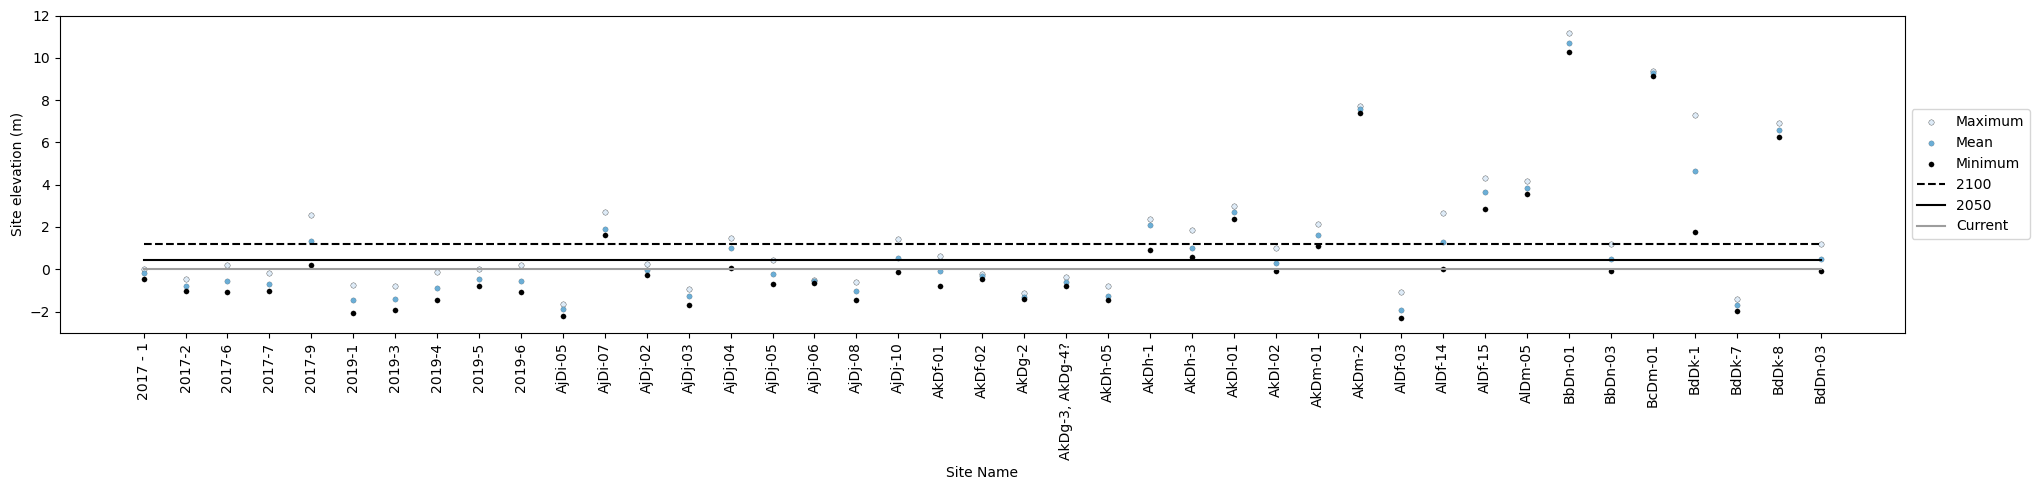

In [22]:
#THIS ONE MAKES THE GRAPH
# Sort the DataFrame by 'X' column
pts_sorted = pts.sort_values('Name')

# Plot the scatter points with sorted data
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot(pts_sorted['Name'], [ 1.18872] * len(pts_sorted), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot(pts_sorted['Name'], [0.4572] * len(pts_sorted), label='2050', color='black')  # 1.5 ft by 2050
plt.plot(pts_sorted['Name'], [0] * len(pts_sorted), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-3, 12)  # Set a larger y-axis range to accommodate all points
plt.ylabel('Site elevation (m)')
plt.xlabel('Site Name')

# Set the figure size to accommodate all x-axis labels
fig_size = (len(pts_sorted) * 0.5, 5)  # Adjust width based on the number of data points
plt.gcf().set_size_inches(fig_size)

# Customize x-axis ticks to label every tenth Longitude value at an angle
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"D:\Users\Classroom\Desktop\DeWater_Archaeology\NS_threat_graph6.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()


KeyError: 'HAT_max_within_5m'

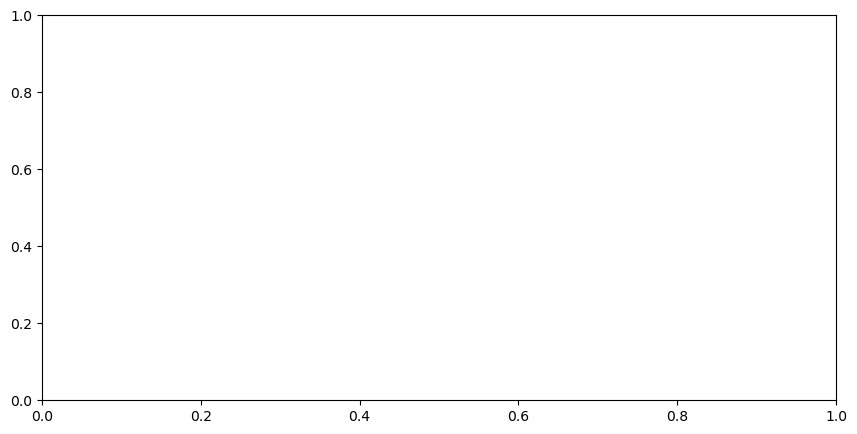

In [13]:
# Sort the DataFrame by 'X' column
pts_sorted = pts.sort_values('Name')

# Set the desired width of the figure (half of the original width)
half_width = len(pts_sorted) * 0.25  # Adjust width based on the number of data points
fig_size = (half_width, 5)  # Maintain the height

# Create the figure and axes for the plot with adjusted width
plt.subplots(figsize=fig_size)

# Plot the scatter points with sorted data
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts_sorted['Name'], pts_sorted['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot(pts_sorted['Name'], [ 1.18872] * len(pts_sorted), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot(pts_sorted['Name'], [0.4572] * len(pts_sorted), label='2050', color='black')  # 1.5 ft by 2050
plt.plot(pts_sorted['Name'], [0] * len(pts_sorted), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-3, 12)  # Set a larger y-axis range to accommodate all points
plt.ylabel('Elevation above HAT (m)')
plt.xlabel('Site Name')

# Customize x-axis ticks to label every tenth Longitude value at an angle
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"D:\Users\Classroom\Desktop\DeWater_Archaeology\NS_threat_graph7.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()

In [23]:
~pts_sorted['HAT_min_within_5m'].isna()

39    True
36    True
35    True
34    True
40    True
18    True
15    True
16    True
17    True
19    True
1     True
2     True
20    True
21    True
22    True
23    True
24    True
3     True
25    True
37    True
38    True
33    True
0     True
28    True
26    True
27    True
4     True
29    True
30    True
5     True
14    True
11    True
12    True
6     True
31    True
32    True
7     True
8     True
9     True
10    True
13    True
Name: HAT_min_within_5m, dtype: bool

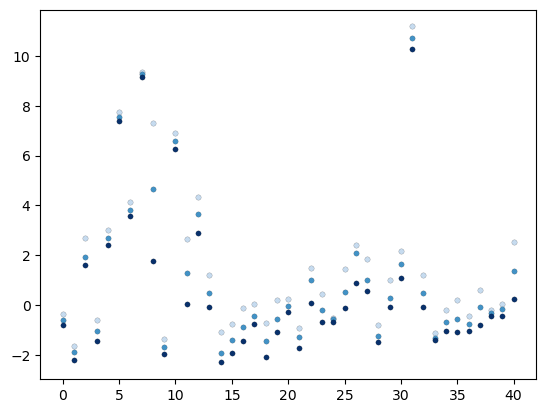

In [24]:
plt.scatter(pts.index, pts['HAT_max_within_5m'], s=15, color='#c6dbef', label='Maximum', edgecolors='black', linewidth=0.1)
plt.scatter(pts.index, pts['HAT_mean_within_5m'], s=15, label='Mean', color='#4292c6', edgecolors='black', linewidth=0.1)
plt.scatter(pts.index, pts['HAT_min_within_5m'], s=15, label='Minimum', color='#08306b', edgecolors='black', linewidth=0.1)

In [25]:
# KD find which points are above 2100 ; 2050 ; Current
# Define the thresholds with meaningful names
thresholds = {
    "2100": 1.18872,
    "2050": 0.4572,
    "Current":0
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for each group
    above_threshold_min = pts[pts['MHW_min_within_5m'] > threshold]
    above_threshold_mean = pts[pts['MHW_mean_within_5m'] > threshold]
    above_threshold_max = pts[pts['MHW_max_within_5m'] > threshold]

    # Print the indices of the points above the threshold for each group
    print("Threshold:", label)
    print("Indices of points (min) above threshold:", above_threshold_min.index)
    print("Indices of points (mean) above threshold:", above_threshold_mean.index)
    print("Indices of points (max) above threshold:", above_threshold_max.index)
    print()

Threshold: 2100
Indices of points (min) above threshold: Int64Index([2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 22, 25, 26, 27, 29, 30, 31, 32,
            40],
           dtype='int64')
Indices of points (mean) above threshold: Int64Index([ 2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 20, 22, 23, 25, 26, 27, 29,
            30, 31, 32, 37, 39, 40],
           dtype='int64')
Indices of points (max) above threshold: Int64Index([ 2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 16, 17, 19, 20, 22, 23, 25,
            26, 27, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40],
           dtype='int64')

Threshold: 2050
Indices of points (min) above threshold: Int64Index([ 0,  2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 20, 22, 23, 24, 25,
            26, 27, 29, 30, 31, 32, 37, 38, 39, 40],
           dtype='int64')
Indices of points (mean) above threshold: Int64Index([ 0,  2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 16, 17, 19, 20, 22, 23,
            24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40],
           dtype=

In [26]:
# KD there are 73 sites
num_sites = len(pts)
print("Number of sites in pts:", num_sites)

Number of sites in pts: 41


In [27]:
# KD find how many sites are above 2100 ; 2050 ; current
# Define the thresholds with meaningful names
# Define thresholds with corrected keys and values
# Define thresholds for elevation ranges
thresholds = {
    "Not_Threatened_in_2100": 1.18872,    # 2100 threshold
    "Threatened_in_2100":  0.4572,          # 2100 threshold
    "Threatened_in_2050": 0,                   # 2050 threshold
    "Threatened_Current": 0                     # 0
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    if threshold == 0:
        # Placeholder for current threatened sites (below 0 m)
        above_threshold_min = pts[pts['MHW_min_within_5m'] < 0]
        above_threshold_mean = pts[pts['MHW_mean_within_5m'] < 0]
        above_threshold_max = pts[pts['MHW_max_within_5m'] < 0]
    else:
        # Identify points within the specified elevation range for each group
        if label == "Threatened_in_2050":
            above_threshold_min = pts[(pts['MHW_min_within_5m'] > 0) & (pts['MHW_min_within_5m'] <= threshold)]
            above_threshold_mean = pts[(pts['MHW_mean_within_5m'] > 0) & (pts['MHW_mean_within_5m'] <= threshold)]
            above_threshold_max = pts[(pts['MHW_max_within_5m'] > 0) & (pts['MHW_max_within_5m'] <= threshold)]
        else:
            above_threshold_min = pts[(pts['MHW_min_within_5m'] > threshold) & (pts['MHW_min_within_5m'] <= threshold + 0.4572)]
            above_threshold_mean = pts[(pts['MHW_mean_within_5m'] > threshold) & (pts['MHW_mean_within_5m'] <= threshold + 0.4572)]
            above_threshold_max = pts[(pts['MHW_max_within_5m'] > threshold) & (pts['MHW_max_within_5m'] <= threshold + 0.4572)]

    # Count the number of sites within the elevation range for each group
    count_min = len(above_threshold_min)
    count_mean = len(above_threshold_mean)
    count_max = len(above_threshold_max)

    # Print the counts for each threshold category
    print("Threshold:", label)
    print("Number of sites (min) within elevation range:", count_min)
    print("Number of sites (mean) within elevation range:", count_mean)
    print("Number of sites (max) within elevation range:", count_max)
    print()

Threshold: Not_Threatened_in_2100
Number of sites (min) within elevation range: 7
Number of sites (mean) within elevation range: 4
Number of sites (max) within elevation range: 7

Threshold: Threatened_in_2100
Number of sites (min) within elevation range: 5
Number of sites (mean) within elevation range: 7
Number of sites (max) within elevation range: 6

Threshold: Threatened_in_2050
Number of sites (min) within elevation range: 10
Number of sites (mean) within elevation range: 5
Number of sites (max) within elevation range: 1

Threshold: Threatened_Current
Number of sites (min) within elevation range: 10
Number of sites (mean) within elevation range: 5
Number of sites (max) within elevation range: 1



In [28]:
# THIS IS WHERE I GOT THE DATA FOR THE TABLE
# Define elevation ranges for categorization
elevation_ranges = {
    "Below_1.112": (float('-inf'), 0),
    "1.112_to_1.112+0.4572": (0, 0.4572),
    "1.112+0.4572_to_1.112+1.18872": (0.4572, 1.18872),
    "Above_1.112+1.18872": (1.18872, float('inf'))
}

# Iterate over the elevation ranges
for label, (lower_bound, upper_bound) in elevation_ranges.items():
    # Identify points within the specified elevation range for min values
    within_elevation_range_min = pts[(pts['HAT_min_within_5m'] > lower_bound) & (pts['HAT_min_within_5m'] <= upper_bound)]
    within_elevation_range_mean = pts[(pts['HAT_mean_within_5m'] > lower_bound) & (pts['HAT_mean_within_5m'] <= upper_bound)]
    within_elevation_range_max = pts[(pts['HAT_max_within_5m'] > lower_bound) & (pts['HAT_max_within_5m'] <= upper_bound)]

    # Count the number of sites within each elevation range for min values
    count_min = len(within_elevation_range_min)
    count_mean = len(within_elevation_range_mean)
    count_max = len(within_elevation_range_max)

    # Print the counts for each elevation range category
    print("Elevation Range:", label)
    print(lower_bound, upper_bound)
    print("Number of sites (min) within elevation range:", count_min)
    print("Number of sites (mean) within elevation range:", count_mean)
    print("Number of sites (max) within elevation range:", count_max)
    print()

Elevation Range: Below_1.112
-inf 0
Number of sites (min) within elevation range: 26
Number of sites (mean) within elevation range: 22
Number of sites (max) within elevation range: 15

Elevation Range: 1.112_to_1.112+0.4572
0 0.4572
Number of sites (min) within elevation range: 3
Number of sites (mean) within elevation range: 1
Number of sites (max) within elevation range: 6

Elevation Range: 1.112+0.4572_to_1.112+1.18872
0.4572 1.18872
Number of sites (min) within elevation range: 3
Number of sites (mean) within elevation range: 5
Number of sites (max) within elevation range: 4

Elevation Range: Above_1.112+1.18872
1.18872 inf
Number of sites (min) within elevation range: 9
Number of sites (mean) within elevation range: 13
Number of sites (max) within elevation range: 16



In [29]:
pts[(pts['MHW_min_within_5m'] > lower_bound) & (pts['MHW_min_within_5m'] <= upper_bound)]

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000,3.334405,3.038000,4.127000,3.421316,2.624000,4.781000,3.381788,1.980000,5.129000,3.019025,1.091000,5.139000,1.914405,1.618000,2.707000
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000,4.117469,3.811000,4.416000,4.024994,3.311000,4.450000,3.683348,2.331000,4.472000,2.749738,0.369000,4.472000,2.697469,2.391000,2.996000
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000,8.983038,8.813001,9.163000,8.909908,8.252001,9.248000,8.592947,3.970000,9.375000,6.723717,-0.038000,9.962001,7.563038,7.393001,7.743000
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000,5.242304,4.984000,5.572000,5.261662,4.911000,5.851000,5.266042,4.092000,6.757000,5.108673,2.300000,8.902000,3.822304,3.564000,4.152000
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001,10.694247,10.581000,10.777000,10.650201,10.463000,10.858001,10.586824,10.051001,10.886001,10.520109,9.311001,11.250001,9.274247,9.161000,9.357000
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001,6.060413,3.181000,8.735001,6.029511,2.574000,11.013000,6.539416,1.541000,16.657001,7.071104,-0.565000,23.894001,4.640413,1.761000,7.315001
10,-65.763997,44.601378,BdDk-8,Little Joggings Site,NaN,2019,POINT (756810.865 4943765.095),7.963000,2.203000,8.004675,7.697001,8.340000,8.024429,7.455000,8.754001,8.053931,6.767000,9.774000,8.131804,4.177000,12.010000,6.584675,6.277001,6.920000
11,-64.967120,43.841320,AlDf-14,NaN,NaN,2019,POINT (824204.171 4862158.765),2.552000,-3.208000,2.713836,1.455000,4.073000,2.715567,0.728000,5.521000,2.588174,-0.702000,6.982000,2.487949,-1.009000,7.698000,1.293836,0.035000,2.653000
12,-64.961907,43.845439,AlDf-15,NaN,NaN,2019,POINT (824600.901 4862636.767),5.049000,-0.711000,5.089785,4.292000,5.751000,5.013608,3.224000,6.275000,4.121546,-0.683000,7.051000,2.449965,-1.026000,8.604000,3.669785,2.872000,4.331000
13,-66.322747,44.286352,BdDn-03,NaN,NaN,2019,POINT (713613.385 4907164.180),1.820000,-3.940000,1.896872,1.335000,2.607000,1.985396,0.899000,3.708000,2.759525,-0.212000,9.060000,4.100786,-2.437000,11.037001,0.476872,-0.085000,1.187000


In [30]:
# THIS IS WHERE I GOT THE DATA FOR THE TABLE
# Define elevation ranges for categorization
elevation_ranges = {
    "Below_1.112": (float('-inf'), 0),
    "1.112_to_1.112+0.4572": (0, 0.4572),
    "1.112+0.4572_to_1.112+1.18872": ( 0.4572,1.18872),
    "Above_1.112+1.18872": (1.18872, float('inf'))
}

# Initialize dictionaries to store the counts
data = {
    "Category": ["min", "mean", "max"]
}


# Iterate over the elevation ranges
for label, (lower_bound, upper_bound) in elevation_ranges.items():
    # Identify points within the specified elevation range for min values
    within_elevation_range_min = pts[(pts['HAT_min_within_5m'] > lower_bound) & (pts['HAT_min_within_5m'] <= upper_bound)]
    within_elevation_range_mean = pts[(pts['HAT_mean_within_5m'] > lower_bound) & (pts['HAT_mean_within_5m'] <= upper_bound)]
    within_elevation_range_max = pts[(pts['HAT_max_within_5m'] > lower_bound) & (pts['HAT_max_within_5m'] <= upper_bound)]

    # Count the number of sites within each elevation range for min values
    count_min = len(within_elevation_range_min)
    count_mean = len(within_elevation_range_mean)
    count_max = len(within_elevation_range_max)

    # Append counts to the data dictionary
    data[label] = [count_min, count_mean, count_max]

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Define the output file path
output_file_path = r"D:\Users\Classroom\Desktop\DeWater_Archaeology\NS_threatened_table_data.csv"

# Write the DataFrame to a CSV file with labeled columns and rows
df.to_csv(output_file_path, index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [31]:
# Define thresholds with corrected keys and values
thresholds = {
    "Not_Threatened_in_2100": 1.112 + 1.18872,    # 2100 threshold
    "Threatened_in_2100": 1.112 + 0.4572,          # 2100 threshold
    "Threatened_in_2050": 1.112,                   # 2050 threshold
    "Threatened_Current": -500                     # No practical current threshold (-500 as placeholder)
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for each group
    above_threshold_min = pts[pts['MHW_min_within_5m'] < threshold]
    above_threshold_mean = pts[pts['MHW_mean_within_5m'] < threshold]
    above_threshold_max = pts[pts['MHW_max_within_5m'] < threshold]

    # Count the number of sites above the threshold for each group
    count_min = len(above_threshold_min)
    count_mean = len(above_threshold_mean)
    count_max = len(above_threshold_max)

    # Print the counts
    print("Threshold:", label)
    print("Number of sites (min) above threshold:", count_min)
    print("Number of sites (mean) above threshold:", count_mean)
    print("Number of sites (max) above threshold:", count_max)
    print()

Threshold: Not_Threatened_in_2100
Number of sites (min) above threshold: 30
Number of sites (mean) above threshold: 26
Number of sites (max) above threshold: 22

Threshold: Threatened_in_2100
Number of sites (min) above threshold: 28
Number of sites (mean) above threshold: 22
Number of sites (max) above threshold: 17

Threshold: Threatened_in_2050
Number of sites (min) above threshold: 21
Number of sites (mean) above threshold: 18
Number of sites (max) above threshold: 12

Threshold: Threatened_Current
Number of sites (min) above threshold: 0
Number of sites (mean) above threshold: 0
Number of sites (max) above threshold: 0



In [32]:
pts

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847000,-4.913000,0.799654,0.634000,1.071000,0.842097,0.452000,1.360000,0.623994,-0.796000,1.591000,0.393047,-0.854000,1.960000,-0.620346,-0.786000,-0.349000
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396000,-6.156000,-0.470165,-0.786000,-0.211000,-0.543955,-1.126000,0.052000,-0.827005,-1.162000,0.062000,-0.987902,-1.189000,0.067000,-1.890165,-2.206000,-1.631000
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000,3.334405,3.038000,4.127000,3.421316,2.624000,4.781000,3.381788,1.980000,5.129000,3.019025,1.091000,5.139000,1.914405,1.618000,2.707000
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376000,-5.384000,0.369846,-0.018000,0.811000,0.616789,-0.331000,3.522000,1.060839,-0.853000,4.309000,1.502906,-0.853000,6.851000,-1.050154,-1.438000,-0.609000
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000,4.117469,3.811000,4.416000,4.024994,3.311000,4.450000,3.683348,2.331000,4.472000,2.749738,0.369000,4.472000,2.697469,2.391000,2.996000
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000,8.983038,8.813001,9.163000,8.909908,8.252001,9.248000,8.592947,3.970000,9.375000,6.723717,-0.038000,9.962001,7.563038,7.393001,7.743000
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000,5.242304,4.984000,5.572000,5.261662,4.911000,5.851000,5.266042,4.092000,6.757000,5.108673,2.300000,8.902000,3.822304,3.564000,4.152000
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001,10.694247,10.581000,10.777000,10.650201,10.463000,10.858001,10.586824,10.051001,10.886001,10.520109,9.311001,11.250001,9.274247,9.161000,9.357000
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001,6.060413,3.181000,8.735001,6.029511,2.574000,11.013000,6.539416,1.541000,16.657001,7.071104,-0.565000,23.894001,4.640413,1.761000,7.315001
9,-65.700592,44.614970,BdDk-7,Smith's Cove,NaN,2019,POINT (761781.661 4945476.628),-0.280000,-6.040000,-0.274897,-0.531000,0.035000,-0.255695,-0.783000,0.391000,-0.220297,-1.217000,0.860000,-0.131365,-2.020000,2.077000,-1.694897,-1.951000,-1.385000


In [33]:
# KD create a table of percentage of site minumum elevation above 2100 + 0.06m; 2050 + 0.06; Jan storm + 0.06
# Define the thresholds with meaningful names
thresholds = {
    "Current":1.112,
    "2050": 1.112 + 0.4572 ,
    "2100": 1.112+ 1.18872 
}

# Initialize a dictionary to store the proportions
proportions = {}

# Get the total number of sites in pts
total_sites = len(pts)

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for the 'min' group
    above_threshold_min = pts[pts['MHW_min_within_5m'] > threshold]

    # Count the number of sites above the threshold for the 'min' group
    count_min = len(above_threshold_min)

    # Calculate the proportion of sites above the threshold for the 'min' group
    proportion_min = count_min / total_sites * 100  # Convert to percentage

    # Store the proportion in the dictionary
    proportions[label] = proportion_min

# Create a DataFrame from the proportions dictionary
proportions_df = pd.DataFrame(proportions, index=["Proportion of sites in 'min' group above threshold (%)"])

# Transpose the DataFrame to have the thresholds as columns
proportions_df = proportions_df.T

# Display the DataFrame
print(proportions_df)

         Proportion of sites in 'min' group above threshold (%)
Current                                          48.780488     
2050                                             31.707317     
2100                                             26.829268     


In [34]:
# Define the thresholds with meaningful names
thresholds = {
    "Current": 1.112,
    "2050": 1.112 + 0.4572,
    "2100": 1.112 + 1.18872
}

# Initialize a dictionary to store the proportions
proportions = {}

# Get the total number of sites in pts
total_sites = len(pts)

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Initialize a dictionary to store the proportions for each group
    group_proportions = {}

    # Iterate over the groups (min, mean, max)
    for group in ['min', 'mean', 'max']:
        # Identify points above the threshold for the current group
        above_threshold = pts[pts[f'MHW_{group}_within_5m'] > threshold]

        # Count the number of sites above the threshold for the current group
        count = len(above_threshold)

        # Calculate the proportion of sites above the threshold for the current group
        proportion = count / total_sites * 100  # Convert to percentage

        # Store the proportion in the dictionary for the current group
        group_proportions[f"Proportion of sites in '{group}' group above threshold (%)"] = proportion

    # Store the proportions for the current threshold in the overall proportions dictionary
    proportions[label] = group_proportions

# Create a DataFrame from the proportions dictionary
proportions_df = pd.DataFrame(proportions)

# Display the DataFrame
print(proportions_df)

                                                      Current       2050  \
Proportion of sites in 'min' group above thresh...  48.780488  31.707317   
Proportion of sites in 'mean' group above thres...  56.097561  46.341463   
Proportion of sites in 'max' group above thresh...  70.731707  58.536585   

                                                         2100  
Proportion of sites in 'min' group above thresh...  26.829268  
Proportion of sites in 'mean' group above thres...  36.585366  
Proportion of sites in 'max' group above thresh...  46.341463  


In [35]:
#three panel figure of min, mean, max elevation underwater by current, 2050, 2100
#9 classes , make 3 columns with dates - 0, 1, 2



In [36]:
# Initialize the 'underwater_min' column with empty values
pts['underwater_min'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_min_within_5m'][i]):
        pts.loc[i, 'underwater_min'] = 'null'
    elif pts['MHW_min_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_min'] = '2100'
    elif pts['MHW_min_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_min'] = '2050'
    elif pts['MHW_min_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_min'] = 'Current'
    else:
        pts.loc[i, 'underwater_min'] = 'threat_now'

In [37]:
# Initialize the 'underwater_mean' column with empty values
pts['underwater_mean'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_mean_within_5m'][i]):
        pts.loc[i, 'underwater_mean'] = 'null'
    elif pts['MHW_mean_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_mean'] = '2100'
    elif pts['MHW_mean_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_mean'] = '2050'
    elif pts['MHW_mean_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_mean'] = 'Current'
    else:
        pts.loc[i, 'underwater_mean'] = 'threat_now'

In [38]:
# Initialize the 'underwater_max' column with empty values
pts['underwater_max'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_max_within_5m'][i]):
        pts.loc[i, 'underwater_max'] = 'null'
    elif pts['MHW_max_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_max'] = '2100'
    elif pts['MHW_max_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_max'] = '2050'
    elif pts['MHW_max_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_max'] = 'Current'
    else:
        pts.loc[i, 'underwater_max'] = 'threat_now'

In [39]:
pts

,X,Y,Name,description,field_5,year,geometry,MSL,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m,underwater_min,underwater_mean,underwater_max
0,-65.079543,43.753494,"AkDg-3, AkDg-4?",NaN,NaN,2019,POINT (815628.584 4851968.266),0.847000,-4.913000,0.799654,0.634000,1.071000,0.842097,0.452000,1.360000,0.623994,-0.796000,1.591000,0.393047,-0.854000,1.960000,-0.620346,-0.786000,-0.349000,threat_now,threat_now,threat_now
1,-65.433367,43.554107,AjDi-05,Swaine's Cove,NaN,2019,POINT (788094.070 4828533.039),-0.396000,-6.156000,-0.470165,-0.786000,-0.211000,-0.543955,-1.126000,0.052000,-0.827005,-1.162000,0.062000,-0.987902,-1.189000,0.067000,-1.890165,-2.206000,-1.631000,threat_now,threat_now,threat_now
2,-65.405484,43.535486,AjDi-07,Purgatory Point,NaN,2019,POINT (790435.988 4826561.935),3.233000,-2.527000,3.334405,3.038000,4.127000,3.421316,2.624000,4.781000,3.381788,1.980000,5.129000,3.019025,1.091000,5.139000,1.914405,1.618000,2.707000,2100,2100,2100
3,-65.549306,43.523813,AjDj-08,Sand Hills,NaN,2019,POINT (778868.257 4824772.615),0.376000,-5.384000,0.369846,-0.018000,0.811000,0.616789,-0.331000,3.522000,1.060839,-0.853000,4.309000,1.502906,-0.853000,6.851000,-1.050154,-1.438000,-0.609000,threat_now,threat_now,threat_now
4,-65.922316,43.815104,AkDl-01,Oyster? Midden,NaN,2019,POINT (747520.651 4855941.957),4.116000,-1.644000,4.117469,3.811000,4.416000,4.024994,3.311000,4.450000,3.683348,2.331000,4.472000,2.749738,0.369000,4.472000,2.697469,2.391000,2.996000,2100,2100,2100
5,-66.138885,43.814794,AkDm-2,Bunker Island,NaN,2019,POINT (730103.830 4855281.983),8.930000,3.170000,8.983038,8.813001,9.163000,8.909908,8.252001,9.248000,8.592947,3.970000,9.375000,6.723717,-0.038000,9.962001,7.563038,7.393001,7.743000,2100,2100,2100
6,-66.121150,43.847595,AlDm-05,NaN,NaN,2019,POINT (731403.254 4858974.778),5.176000,-0.584000,5.242304,4.984000,5.572000,5.261662,4.911000,5.851000,5.266042,4.092000,6.757000,5.108673,2.300000,8.902000,3.822304,3.564000,4.152000,2100,2100,2100
7,-66.075872,44.382468,BcDm-01,Majors Point,NaN,2019,POINT (732930.401 4918513.405),10.697001,4.937001,10.694247,10.581000,10.777000,10.650201,10.463000,10.858001,10.586824,10.051001,10.886001,10.520109,9.311001,11.250001,9.274247,9.161000,9.357000,2100,2100,2100
8,-65.683406,44.622488,BdDk-1,Bear River,NaN,2019,POINT (763111.265 4946367.105),7.295001,1.535001,6.060413,3.181000,8.735001,6.029511,2.574000,11.013000,6.539416,1.541000,16.657001,7.071104,-0.565000,23.894001,4.640413,1.761000,7.315001,2100,2100,2100
9,-65.700592,44.614970,BdDk-7,Smith's Cove,NaN,2019,POINT (761781.661 4945476.628),-0.280000,-6.040000,-0.274897,-0.531000,0.035000,-0.255695,-0.783000,0.391000,-0.220297,-1.217000,0.860000,-0.131365,-2.020000,2.077000,-1.694897,-1.951000,-1.385000,threat_now,threat_now,threat_now


In [ ]:
pts.to_csv('points_to_map.csv', index=False)

In [ ]:
pts.iloc[52] 